###  <font color=darkblue >A glass manufacturing plant uses different earth elements to design new glass materials based on customer requirements. For that, they would like to automate the process of classification as it’s a tedious job to manually classify them. Help the company achieve its objective by correctly classifying the glass type based on the other features using KNN algorithm.<font/>
    

## <font color=blue>Step 1.<font/>

### <font color=red>Bussiness objective:-<font/> <font color=black>Maximize the accuracy of the KNN classifier model.<font/>

### <font color=red>Bussiness contraints:- <font/> <font color=black>Minimize the model error percentage.<font/>

## <font color=blue>Step 2.<font/>

### <font color=red>Data Understanding and Analysis<font/>

In [ ]:
# Importing the libraries.

import pandas as pd
import numpy as np

In [ ]:
# Loading the dataset

glass = pd.read_csv("glass.csv")


In [ ]:
# To print top five records of the dataset.
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# To check the basic information about the data
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
# To check the statistical information and distribution of the data

glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
# Counting the number of missing values in the dataset
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## <font color=blue>Step 3.<font/>

### <font color=red>Data Pre-Cleansing or Data Preparation:<font/>

In [ ]:
# Scaling of the features is required
# Normalization function

def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

# Normalized data frame
glass_norm = norm_func(glass.iloc[:, :9])
glass_norm.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the data into input and output variable

In [ ]:

X = np.array(glass_norm.iloc[:, :]) # Predictors/ input variable 
Y = np.array(glass['Type']) # Target/ output variable


In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## <font color=blue>Step 4.<font/>

### <font color=red>Model Building - KNeighborsClassifier<font/>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15)

## <font color=blue>Step 5.<font/>

### <font color=red>Model Evaluation - Multinomial NaiveBayes<font/>

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score


############# Evaluation on Train Data #################
pred_train = knn.predict(X_train)
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 
print(accuracy_score(Y_train, pred_train))

0.6666666666666666


In [ ]:
############# Evaluation on Test Data #################
pred = knn.predict(X_test)
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 
print(accuracy_score(Y_test, pred))

0.7209302325581395


### Tunning the Model to find the best K value - Running KNN algorithm for 3 to 50 nearest neighbours (odd numbers) and storing the accuracy values

In [ ]:
# creating empty list variable 
acc = []

# Running KNN algorithm for 3 to 50 nearest neighbours (odd numbers) and 
# Storing the accuracy values

for i in range(3, 50, 2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])


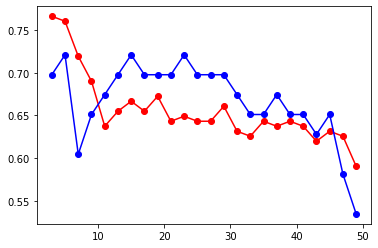

In [ ]:
# Visualizations of the accuracies of all the models

import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3, 50, 2), [i[0] for i in acc], "ro-")

# test accuracy plot
plt.plot(np.arange(3, 50, 2), [i[1] for i in acc], "bo-")